# NN with Keras

### Import libraries

This notebook was run and tested on Keras version 3.3.3 and Tensorflow 2.16.1

In [27]:
#!pip install tensorflow
# Check keras and tensorflow versions

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  3.3.3
Tensorflow version:  2.16.1


In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

### Load data

In [3]:
# The diabetes dataset
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [5]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [6]:
# How many observations are in y?
len(y)

442

In [7]:
y.shape

(442,)

### Split the data (training/test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [9]:
# Set up the model architecture
model = Sequential()

In [10]:
model.add(Input(shape=(n_cols,)))
# Add the first hidden layer
model.add(Dense(15, activation = 'relu'))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [11]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [12]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [13]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [14]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 300,
    verbose = 1)

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 29403.8555 - mse: 29403.8555 - val_loss: 28057.6465 - val_mse: 28057.6465
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28142.0938 - mse: 28142.0938 - val_loss: 27993.7148 - val_mse: 27993.7148
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29328.7324 - mse: 29328.7324 - val_loss: 27897.9844 - val_mse: 27897.9844
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29547.3984 - mse: 29547.3984 - val_loss: 27768.5137 - val_mse: 27768.5137
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28890.5879 - mse: 28890.5879 - val_loss: 27596.7812 - val_mse: 27596.7812
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27752.6406 - mse: 27752.6406 - val_loss: 27382.0000 - val_mse: 27382.0000
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26865.0352 - mse: 26865.0352 - val_loss: 27105.8613 - val_mse: 27105.8613
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26997.002

### Create predictions

In [15]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [16]:
predictions

array([[177.52724 ],
       [190.72972 ],
       [168.83282 ],
       [235.27657 ],
       [190.44328 ],
       [265.82504 ],
       [155.25854 ],
       [ 66.218475],
       [150.2533  ],
       [171.70073 ],
       [219.60846 ],
       [195.61716 ],
       [ 94.47559 ],
       [226.76416 ],
       [ 92.53423 ],
       [222.08733 ],
       [ 81.13485 ],
       [124.674545],
       [134.50853 ],
       [155.90854 ],
       [ 80.550285],
       [ 78.82689 ],
       [192.36983 ],
       [122.57    ],
       [229.67287 ],
       [187.84283 ],
       [118.96318 ],
       [ 93.227776],
       [181.88403 ],
       [229.19989 ],
       [228.8311  ],
       [232.00589 ],
       [162.15688 ],
       [120.06552 ],
       [126.499596],
       [158.76607 ],
       [107.23675 ],
       [230.64993 ],
       [205.89876 ],
       [126.01913 ],
       [ 99.99422 ],
       [121.633354],
       [186.49551 ],
       [229.80002 ],
       [142.17497 ],
       [262.5611  ],
       [155.36665 ],
       [198.1

### Evaluate the model

In [17]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3363.8755 - mse: 3363.8755 

Test loss: 3281.513672


In [18]:
score

[3281.513671875, 3281.513671875]

In [19]:
# Find RMSE
score[0] ** (1/2)

57.28449765752511

In [20]:
y.mean()

152.13348416289594

In [21]:
y.std()

77.00574586945044

In [22]:
y.min()

25.0

In [23]:
y.max()

346.0

### Visualization of cost

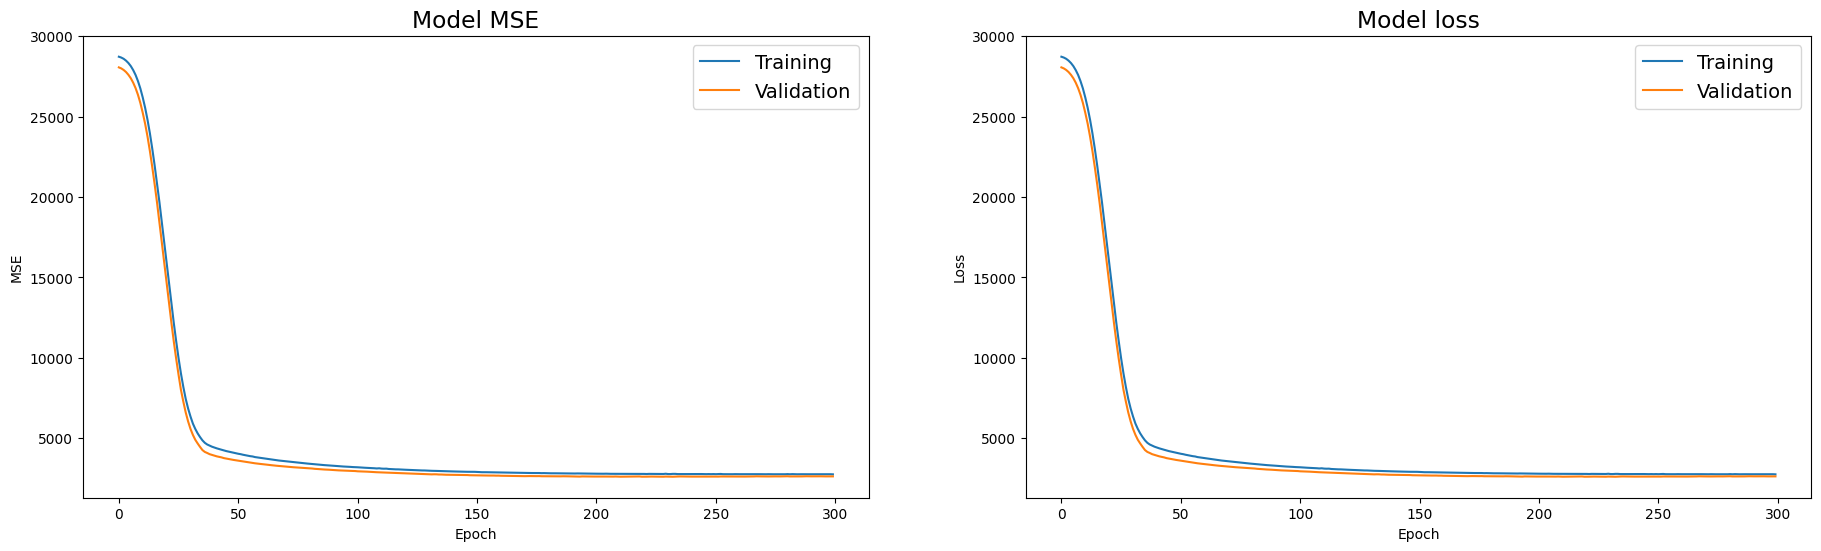

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualization of residuals

In [25]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

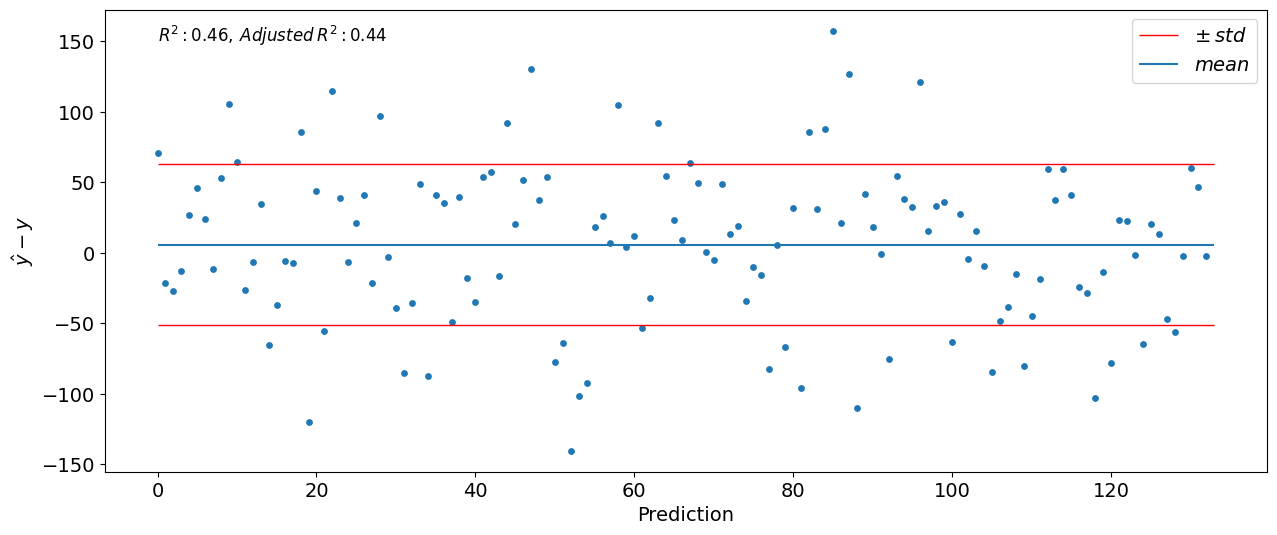

In [26]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()